```Ecole Centrale Nantes
Option InfoIA
PAPY: Programmation avancée python
CM3
Année 2022-2023
Auteur: Lucas Lestandi
lucas.lestandi@ec-nantes.fr
V1.0
```

# Chapitre 3 : Programmer avec des modules 

**Aujourd'hui** : Cours/TP, TP-cours

**Semaine prochaine:** TP noté, rapport à remettre avant la prochaine séance.

## Rappels sur les modules

**Références:**
- https://docs.python.org/fr/3/tutorial/modules.html
- https://www.pierre-giraud.com/python-apprendre-programmer-cours/module-paquet/

### Un module, c'est quoi?

<div class="alert alert-success" role="alert">
   On appèle <b>module</b> tout fichier <code>.py</code> importé dans un autre fichier/script python. On peut les voir comme des bibliothèques.
</div>

Ils permettent d'organiser le code en unités distinctes et améliorent la réutilisation.

**Place dans le langage**

On distingue 3 types de langages:
- les modules standards 
- les modules externes
- nos propres modules

### Importer un module

**Syntaxe:**
```python
import mymodule as mm
from module_toto import toto, tata
```

<div class="alert alert-danger" role="alert">
   <b> Attention : </b> ne jamais utiliser <br>
   <code> from module_toto import * </code>
</div>

In [1]:
# Exemple
def time():
    print("Bonne question, je n'ai pas encore importé le module time")
    
time()

Bonne question, je n'ai pas encore importé le module time


In [2]:
from time import *
time()

1666824948.3710554

#### Importer son propre module

**Cas 1:** le fichier se trouve
- dans le dossier ou est exécuté l'interpréteur/python

ou
- notre module a été "installé"

In [3]:
%%writefile mymodule.py
def my_function():
    print("Hello from a function")

Overwriting mymodule.py


In [4]:
my_function()

NameError: name 'my_function' is not defined

In [5]:
import mymodule
mymodule.my_function()

Hello from a function


**Cas 2:** le fichier se trouve
- dans un autre dossier
    1. loin dans l'arborescence 
    2. juste à coté

In [3]:
! mkdir sous_dossier
! mv mymodule.py sous_dossier/mymodule.py
! ls sous_dossier/

mkdir: impossible de créer le répertoire «sous_dossier»: Le fichier existe
mv: impossible d'évaluer 'mymodule.py': Aucun fichier ou dossier de ce type
mymodule.py  __pycache__


In [7]:
import sous_dossier.mymodule as mymodule

In [8]:
! cp sous_dossier/mymodule.py ../mymodule.py

In [9]:
# L'mportation relative explicite ne fonctionne que pour les paquets
from ..mymodule import my_function

ImportError: attempted relative import with no known parent package

En fait, on utilisera plutot la méthode robuste, qui est valide quelque soit l'emplacement du fichier : l'ajout du `chemin/du/fichier/mymodule.py` au `sys.path`.

In [10]:
import sys 
print(sys.path)

['/home/rlucas/Documents/PAPY/C3', '/home/rlucas/anaconda3/lib/python39.zip', '/home/rlucas/anaconda3/lib/python3.9', '/home/rlucas/anaconda3/lib/python3.9/lib-dynload', '', '/home/rlucas/anaconda3/lib/python3.9/site-packages']


In [11]:
sys.path.append("/mnt/c/Users/llestand/Documents/teaching/cours/InfoIA/PAPY_2022/")
import mymodule
mymodule.__file__

'/home/rlucas/Documents/PAPY/C3/mymodule.py'

Plus d'infos ☞ https://docs.python.org/fr/3/reference/import.html

### Installer des modules externes

- conda
`conda install -c channel package`
- pip
`pip install package`
- Depuis les sources (pour tout paquet digne de ce nom)
```shell
$ cd path/to/souces
$ pip install -e .
```


<div class="alert alert-success" role="alert">
   <b> Rappel : </b> avant de coder un classe compliquée (ou pas):
    <ol>
        <li> Est-ce que la bibliothèque standard propose un outil adapté ?</li>
        <li> Est-ce qu'un bibliothèque reconnue fait déjà ce dont j'ai besoin ? </li>
        <li> Est-ce que j'ai déjà codé un module similaire? </li>
        <li> Est-ce que des modules faisant une partie du travail existent </li>
    </ol>
</div>

<div class="alert alert-danger" role="alert">
   <b> Mais attention ! </b> Il faut s'assurer de la fiabilité des libraries:
    <ul>
        <li> Des release depuis quand, souvent?</li>
        <li> Facile à installer, les dépences sont-elles bien gérées</li>
        <li> Y-t-il des changements qui cassent votre code?</li>
        <li> Qualité de la doc</li>
        <li> Testing automatique?</li>
        <li> Une seule personne / communauté / organisation?</li>
        <li> Code source accessible publiquement, bug reports, forums, etc.</li>
        <li> Citation? </li>
    </ul>
</div>

## Les modules natifs

### Intéragir avec son environnement : `os`, `sys`, `path?lib`

####  `os`

- Pour interragir avec le système d'exploitation
- Travailler avec avec les fichiers et les répertoires.
> On retrouve beaucoup de similarités avec le shell. 
> 
> ++ Fonctionne avec tous les OS

In [12]:
import os
print(os.name)
print(os.getcwd())

posix
/home/rlucas/Documents/PAPY/C3


**Une réplique du shell?**

In [13]:
os.mkdir("testdir")
os.listdir()

['PAPY_C3.ipynb',
 'testdir',
 '__pycache__',
 'sous_dossier',
 '.ipynb_checkpoints']

In [14]:
os.chdir("testdir/")
os.getcwd()

'/home/rlucas/Documents/PAPY/C3/testdir'

In [15]:
os.chdir("..")
os.rmdir('testdir/')

In [16]:
os.listdir()

['PAPY_C3.ipynb', '__pycache__', 'sous_dossier', '.ipynb_checkpoints']

<div class="alert alert-info" role="alert">
    <b> Exercice : </b> Créer un fichier <code>toto.txt</code> dans un sous dossier <code>toto</code> puis le supprimer sans effacer le dossier (<code>os.remove</code>).
</div>

In [25]:
os.mkdir("toto")
os.chdir("toto")
with open("toto.txt", "w") as file:
    pass
print(os.listdir())
os.remove("toto.txt")
print(os.listdir())
os.chdir("..")
os.rmdir("toto")

/home/rlucas/Documents/PAPY/C3
['toto.txt']
[]


In [26]:
#solution
os.makedirs("toto/",exist_ok=True) #exist_ok permet de passer cette ligne si le dossier existe dejà
with open("toto/toto.txt","w") as file:
    pass
os.remove("toto/toto.txt")

In [27]:
#Une solution pour la fonction tree consistait à s'appuyer sur os.walk
for path in os.walk("."):
    print(path)

('.', ['toto', '__pycache__', 'sous_dossier', '.ipynb_checkpoints'], ['PAPY_C3.ipynb'])
('./toto', [], [])
('./__pycache__', [], ['mymodule.cpython-39.pyc'])
('./sous_dossier', ['__pycache__'], ['mymodule.py'])
('./sous_dossier/__pycache__', [], ['mymodule.cpython-39.pyc'])
('./.ipynb_checkpoints', [], ['PAPY_C3-checkpoint.ipynb'])


#### `sys`
> Interagir avec l’interpréteur Python

In [2]:
import sys
sys.version
sys.argv

['/home/rlucas/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py',
 '-f',
 '/home/rlucas/.local/share/jupyter/runtime/kernel-c7bc7c4f-26b3-4ee0-bb95-5bf9d5342786.json']

In [3]:
sys.path

['/home/rlucas/Documents/PAPY/C3',
 '/home/rlucas/anaconda3/lib/python39.zip',
 '/home/rlucas/anaconda3/lib/python3.9',
 '/home/rlucas/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/home/rlucas/anaconda3/lib/python3.9/site-packages']

In [4]:
sys.platform

'linux'

### Lancer des programmes depuis python avec `subprocess` et `Popen`
> *Pour démarrer des programmes externes*

> **Rappel:** Un *process(us)* est l'abstraction de l'OS pour un programme en cours d'éxécution.

(ouvrir htop dans un terminal)

Pourquoi utiliser `subprocess`?
- analyser d'une *blackbox*
- écrire un wrapper pour un application
- lancer une autre application
- alternative à du scripting shell

In [5]:
import subprocess

In [6]:
result=subprocess.run(["ping","-c", "5","google.com"])
#result=subprocess.run(["ping","google.com"]) sous windows

PING google.com (216.58.198.206) 56(84) bytes of data.
64 bytes from par10s27-in-f206.1e100.net (216.58.198.206): icmp_seq=1 ttl=115 time=16.2 ms
64 bytes from par10s27-in-f14.1e100.net (216.58.198.206): icmp_seq=2 ttl=115 time=10.3 ms
64 bytes from par10s27-in-f206.1e100.net (216.58.198.206): icmp_seq=3 ttl=115 time=10.9 ms
64 bytes from par10s27-in-f206.1e100.net (216.58.198.206): icmp_seq=4 ttl=115 time=11.0 ms
64 bytes from par10s27-in-f206.1e100.net (216.58.198.206): icmp_seq=5 ttl=115 time=11.3 ms

--- google.com ping statistics ---
5 packets transmitted, 5 received, 0% packet loss, time 4008ms
rtt min/avg/max/mdev = 10.294/11.950/16.212/2.154 ms


In [7]:
result

CompletedProcess(args=['ping', '-c', '5', 'google.com'], returncode=0)

In [8]:
subprocess.run(["tree",]) # si vous avez installé la commande tree

FileNotFoundError: [Errno 2] No such file or directory: 'tree'

**Et si ça se passe mal?**

In [9]:
result=subprocess.run(["ping","-c", "5","ec-nantes.fr"])

PING ec-nantes.fr (130.66.41.42) 56(84) bytes of data.
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=1 ttl=62 time=2.69 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=2 ttl=62 time=4.19 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=3 ttl=62 time=79.3 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=4 ttl=62 time=3.89 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=5 ttl=62 time=1.18 ms

--- ec-nantes.fr ping statistics ---
5 packets transmitted, 5 received, 0% packet loss, time 4007ms
rtt min/avg/max/mdev = 1.175/18.249/79.294/30.540 ms


In [10]:
result=subprocess.run(["ping","-c", "5","ec-nantes.fr"],check=True)

PING ec-nantes.fr (130.66.41.42) 56(84) bytes of data.
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=1 ttl=62 time=1.25 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=2 ttl=62 time=1.17 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=3 ttl=62 time=5.29 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=4 ttl=62 time=2.65 ms
64 bytes from proxywaf.ec-nantes.fr (130.66.41.42): icmp_seq=5 ttl=62 time=85.5 ms

--- ec-nantes.fr ping statistics ---
5 packets transmitted, 5 received, 0% packet loss, time 4008ms
rtt min/avg/max/mdev = 1.174/19.173/85.502/33.197 ms


**Capturer les outputs `stdout` et `stderr`**

In [11]:
result=subprocess.run(["ping","-c", "5","google.fr"],check=True, capture_output=True)

In [12]:
result

CompletedProcess(args=['ping', '-c', '5', 'google.fr'], returncode=0, stdout=b'PING google.fr (172.217.22.131) 56(84) bytes of data.\n64 bytes from par21s12-in-f3.1e100.net (172.217.22.131): icmp_seq=1 ttl=115 time=9.98 ms\n64 bytes from par21s12-in-f3.1e100.net (172.217.22.131): icmp_seq=2 ttl=115 time=92.6 ms\n64 bytes from par21s12-in-f3.1e100.net (172.217.22.131): icmp_seq=3 ttl=115 time=10.1 ms\n64 bytes from par21s12-in-f3.1e100.net (172.217.22.131): icmp_seq=4 ttl=115 time=10.0 ms\n64 bytes from par21s12-in-f3.1e100.net (172.217.22.131): icmp_seq=5 ttl=115 time=10.0 ms\n\n--- google.fr ping statistics ---\n5 packets transmitted, 5 received, 0% packet loss, time 4006ms\nrtt min/avg/max/mdev = 9.975/26.547/92.590/33.021 ms\n', stderr=b'')

<div class="alert alert-danger" role="alert">
   <b> Attention aux interractions utilisateur/subprocess: </b> 
   <code> subprocess.run(["bash", "-c", f"ls {input()}"])</code> peut avoir des conséquences désastreuses si l'input est <code> .; rm -rf /* </code>
</div>

<div class="alert alert-success" role="alert">
    <b> Pour aller plus loin : </b> la classe <code>subprocess.Popen</code> propose de un controle plus fin et en particulier des appels non bloquants! 
    <br> <br>
    <u>Biblio</u>: <br>
    <a href="https://realpython.com/python-subprocess/"> https://realpython.com/python-subprocess</a> <br>
    <a href="https://docs.python.org/3/library/subprocess.html"> https://docs.python.org/3/library/subprocess.html </a>
</div> 


### Quelques modules de la bibliothèque standards
https://docs.python.org/fr/3/library/index.html

Quelques exemples que l'on retrouve fréquemment
- `itertools` — Fonctions créant des itérateurs pour boucler efficacement
- `functools` — Fonctions d'ordre supérieur et opérations sur des objets appelables
- `numbers `  — Classes de base abstraites numériques
- `math`      — Fonctions mathématiques  
- `pathlib` — Chemins de système de fichiers orientés objet
- `shutil` — Opérations de haut niveau sur les fichiers
- `gzip` — Support pour les fichiers gzip
- `time` — Accès au temps et conversions
- `argparse` — Parseur d'arguments, d'options, et de sous-commandes de ligne de commande

## Deux bibliothèques à maitriser absolument

### `numpy`
> **num**erical **py**thon

In [3]:
import numpy as np

Numpy est à la base de tout l'écosystème scientigique en python
![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig2_HTML.png?as=webp)

*Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). https://doi.org/10.1038/s41586-020-2649-2*

#### Pourquoi ne pas utiliser les listes? 
- `numpy` s'appuie sur des bibliothèques compilées C/Fortran : `blas`, `lapack`, `mkl`,...
- `numpy` permet la vectorisation/parallelisme local

In [2]:
n=int(1e7)

In [12]:
%%time
tableau_list=range(n)
for i in tableau_list:
    i = i**2

CPU times: user 5.1 s, sys: 15.6 ms, total: 5.12 s
Wall time: 5.14 s


In [9]:
%%time
tableau_np=np.arange(n)
tableau_np=tableau_np**2


CPU times: user 105 ms, sys: 160 ms, total: 265 ms
Wall time: 264 ms


In [19]:
%%timeit
tableau_list=[i**2 for i in range(n)]

4.49 s ± 66.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<div class="alert alert-success" role="alert">
   <b> Remarque : </b> un certain nombre de méthodes sont exécutés nativement en parallèle. 
</div>

In [3]:
%%time
mat=np.random.rand(10000,1000)
np.linalg.svd(mat)
del mat

CPU times: user 2min 5s, sys: 6.8 s, total: 2min 12s
Wall time: 1min 34s


In [4]:
def formule_exotique(x:float)->float:
        return 3*x+x**3+12543154

In [10]:
formule_exotique(tableau_np)

array([            12543154,             12543158,             12543230,
       ..., -1865561243924812378, -8325628571914455298,
        1088879220105467574])

In [13]:
formule_exotique(tableau_list)

TypeError: unsupported operand type(s) for *: 'int' and 'range'

#### La classe `ndarray`

Les `ndarray` sont des tableaux multidimensionnels. 
> Contrairement aux listes, leur type interne est fixé et identique pour tous les éléments 

In [15]:
A=np.ndarray((2,3),dtype="d")
A

array([[ 6.19714148e-317,  6.19714346e-317,  6.19717903e-317],
       [-7.48773115e+183, -1.19700044e-248,  6.99687177e-236]])

In [16]:
# Les iniitialisation classiques
A=np.array([[1,3],[2,4]])
#...

<div class="alert alert-info" role="alert">
    <b> Exercice numpy: manipuler des tableaux </b> 
    <ol>
        <li><b> Types de données</b> Quelle est la différence entre <code> np.arange(10)</code> et <code> np.linspace(0,9,10)</code>. Comment passer de l'une à l'autre après la création du tableau? </li>
        <li><b> Types de données</b> Créer un tableau $2\times 4$ rempli d'entiers aléatoires (<code> np.random.random</code>).  </li>
        <li><b> Reshape </b> Créer un tableau $2\times 3$ d'entiers aléatoires entre 1 et 10 et essayer d'en changer la forme.  </li>
        <li><b> Entrée sorties numpy (IO)</b> Sauvegarder les données dans un fichier ".npy" puis lire à nouveau (<code>np.save, np.load</code>). </li>
    </ol>
</div>

In [26]:
print(np.arange(10))
print(np.linspace(0,9,10))
#arange produit un tableau d'entier alors que linspace produit un tableau de float.
print(np.arange(10).astype(np.float64))
print(np.linspace(0,9,10).astype(np.int64))

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0 1 2 3 4 5 6 7 8 9]


In [28]:
result = np.random.random([2,4])
result

array([[0.80140089, 0.66456702, 0.64977936, 0.89409612],
       [0.55963462, 0.86990811, 0.19340201, 0.91515805]])

In [30]:
from random import randint
A = np.ndarray((2,3), dtype=np.int64)
for i in range(2):
    for j in range(3):
        A[i][j] = randint(1,10)
A.reshape(6,1)

array([[7],
       [4],
       [8],
       [2],
       [7],
       [3]])

In [31]:
np.save("numpy test", A)
B = np.load("numpy test.npy")
B

array([[7, 4, 8],
       [2, 7, 3]])

**Au fait, un `array` c'est mutable ou pas?**

In [32]:
a = np.eye(4)
b = a[:,0]
b[0] = 5
#a?

In [33]:
a

array([[5., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

`b` est une "vue" de `a`, ça économise (beaucoup de mémoire pour les grands tableaux. Pour copier, il faudra etre explicite:

In [34]:
a = np.eye(4)
b = a[:,0].copy()
b[0] = 5
a

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<div class="alert alert-danger" role="alert">
   <b> Attention : </b> puisque les ndarray sont mutables, ils ont le même comportement dans les
        fonctions que les listes.
</div>

In [35]:
def modifier_array(a):
    a[0]=1000

modifier_array(a)
print(a)

[[1000. 1000. 1000. 1000.]
 [   0.    1.    0.    0.]
 [   0.    0.    1.    0.]
 [   0.    0.    0.    1.]]


In [36]:
#par contre
def modifier_array(a):
    a=-1

modifier_array(a)
print(a)

[[1000. 1000. 1000. 1000.]
 [   0.    1.    0.    0.]
 [   0.    0.    1.    0.]
 [   0.    0.    0.    1.]]


##### Opérations sur les `array` 

Numpy est l'outil idéal pour effectuer des calculs sur des tableaux!
- les opérateurs classiques surchargés `+`,`-`, `*`,... sont des opérations termes à termes, **avec broadcasting**
- les autres opérations dont vous aurez besoin généralement déjà implémentés dans des méthodes. A noter le cas particulier du `@` pour le produit matriciel.

**Broadcasting:**
> Le guide de référence : https://numpy.org/doc/stable/user/basics.broadcasting.html

![Schéma_1D](https://numpy.org/doc/stable/_images/broadcasting_1.png)

In [ ]:
a=np.arange(1,4)
b=2
a*b

![schema_2dx1d](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [ ]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

![Cas qui ne marche pas](https://numpy.org/doc/stable/_images/broadcasting_3.png)

In [ ]:
b = np.arange(1,5)
a+b 

En fait, on pouvait déjà faire tout ça en une seule étape! 
![](https://numpy.org/doc/stable/_images/broadcasting_4.png)

In [ ]:
a = np.linspace(0,30,4).reshape(4,1)+np.arange(1,5)
a

<div class="alert alert-info" role="alert">
    <b> Exercice:</b> En algèbre linéaire, une <b>matrice de Vandermonde</b> est une matrice avec une progression géométrique dans chaque ligne.

De façon matricielle, elle se présente ainsi : 

$$V=\begin{pmatrix}
1 & \alpha_1 & {\alpha_1}^2 & \dots & {\alpha_1}^{n-1}\\
1 & \alpha_2 & {\alpha_2}^2 & \dots & {\alpha_2}^{n-1}\\
1 & \alpha_3 & {\alpha_3}^2 & \dots & {\alpha_3}^{n-1}\\
\vdots & \vdots & \vdots & &\vdots \\
1 & \alpha_m & {\alpha_m}^2 & \dots & {\alpha_m}^{n-1}\\
\end{pmatrix}$$
Autrement dit, pour tous $i$ et $j$, $$V_{i,j} = {\alpha_i}^{j-1}.$$
    <b> Propriété 1: </b> On considère une matrice $V$ de Vandermonde carrée $m = n$. Elle est inversible si et seulement si les $\alpha_{i}$ sont deux à deux distincts. <br>
    <b> Propriété 2: </b> Le déterminant d'une matrice $n\times n$ de Vandermonde peut s'exprimer ainsi :
$$ \det(V)=\prod _{1\leq i<j\leq n}(\alpha _{j}-\alpha _{i})
$$
    <ol>
        <li> Créer une fonction qui construit la matrice de Vandermonde pour un vecteur (numpy) de taille quelconque </li>
          <li> Vérifier la propriété 1 <code>np.linalg.[inv,det,getH]</code> </li>
          <li> En profiter pour comparer  <code>*,@,np.dot</code> 
          <li> Vérifier la propriété 2 </li>
          <li> Quelle est la différence entre <code>np.sum(axis=1)</code> et <code>np.sum(axis=0)</code></li>        
    </ol>
</div>

```python
>>> # Question 1
>>> vandermonde(np.arange(3),4)
array([[1., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 2., 4., 8.]])

>>> # Question 2 : det(V)!=0, VV^(-1)=? 
>>> 
```


In [60]:
# adapté de https://github.com/numpy/numpy/blob/v1.23.0/numpy/lib/twodim_base.py#L546-L634
def vandermonde(X,N = None):
    x = np.asarray(X)
    if x.ndim != 1:
        raise ValueError("x must be a one-dimensional array or sequence.")
    if N is None:
        N = len(x)

    tmp = np.empty((len(x), N))

    if N > 0:
        tmp[:, 0] = 1
    if N > 1:
        tmp[:, 1:] = x[:, None] # On copie x dans toutes les cases de manière implicite
        np.multiply.accumulate(tmp[:, 1:], out=tmp[:, 1:], axis=1)

    return tmp

##### Jouer avec les dimensions

In [4]:
# Afficher des propriétés
def print_ndarray_properties(array : "ndarray")-> None:
    print(f"Dims:     {array.ndim}")
    print(f"Shape:    {array.shape}")
    print(f"Size:     {array.size}")
    print(f"dtype:    {array.dtype}")
    print(f"itemsize: {array.itemsize}")
    print(f"data:     {array.data}")
    

In [7]:
A=np.random.rand(3,4,5,6)
print_ndarray_properties(A)

Dims:     4
Shape:    (3, 4, 5, 6)
Size:     360
dtype:    float64
itemsize: 8
data:     <memory at 0x7fdcc802b140>


In [8]:
print_ndarray_properties(A.ravel()) # renvoie une vue

Dims:     1
Shape:    (360,)
Size:     360
dtype:    float64
itemsize: 8
data:     <memory at 0x7fdcb8199940>


In [70]:
print_ndarray_properties(A)

Dims:     4
Shape:    (3, 4, 5, 6)
Size:     360
dtype:    float64
itemsize: 8
data:     <memory at 0x7f8be318ae40>


In [71]:
print_ndarray_properties(np.ravel(A)) 
# renvoie une copie

Dims:     1
Shape:    (360,)
Size:     360
dtype:    float64
itemsize: 8
data:     <memory at 0x7f8be318f700>


In [72]:
print_ndarray_properties(A.reshape(3,4,-1)) 
# renvoie une vue avec la forme souhaitée

Dims:     3
Shape:    (3, 4, 30)
Size:     360
dtype:    float64
itemsize: 8
data:     <memory at 0x7f8be3159400>


In [73]:
A.resize(3,4,30)
print_ndarray_properties(A)
# renvoie une vue avec la forme souhaitée

Dims:     3
Shape:    (3, 4, 30)
Size:     360
dtype:    float64
itemsize: 8
data:     <memory at 0x7f8be3159400>


In [74]:
print_ndarray_properties(A[:,:2,:-5])
# renvoie une copie

Dims:     3
Shape:    (3, 2, 25)
Size:     150
dtype:    float64
itemsize: 8
data:     <memory at 0x7f8be3159400>


##### Stack split et bien d'autres choses

In [75]:
a1 = np.array([[1, 1],
               [2, 2]])
a2 = np.array([[3, 3],
               [4, 4]])
np.vstack((a1, a2))

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [76]:
np.hstack((a1, a2))

array([[1, 1, 3, 3],
       [2, 2, 4, 4]])

In [77]:
x = np.arange(1, 25).reshape(2, 12)
print(x)
np.hsplit(x, 3)

[[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [13 14 15 16 17 18 19 20 21 22 23 24]]


[array([[ 1,  2,  3,  4],
        [13, 14, 15, 16]]),
 array([[ 5,  6,  7,  8],
        [17, 18, 19, 20]]),
 array([[ 9, 10, 11, 12],
        [21, 22, 23, 24]])]

Pour aller plus loin : 
- https://numpy.org/doc/stable/user/quickstart.html et tous les autres guides officiels
- [From python to Numpy, Nicolar rougier](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)
- [numpy tutorial](https://github.com/rougier/numpy-tutorial)

### `matplolib`

**La bibliothèque de visiualisation de base de python.**

- Fonctionne main dans la main avec `numpy`
- Export matriciel ou vectoriel
- Animations

```python
import matplotlib.pyplot as plt
```

Numpy propose deux interfaces : 
1. **Impérative** qui permet d'afficher des graphes simples `plt.plot(x :"absscisses", y:"valeurs")`
1. **Orienté objet**, on instancie pour un controle plus fin

Voyons quelques exemples tirés de 
- [Programmation python avancée](https://github.com/xoolive), X. Olive
- [matplotlib-tutorial](https://github.com/rougier/matplotlib-tutorial), N. Rougier

Ou vous trouverez des desccriptions plus détaillées

#### Approche impérative

**Exemple impératif simple**

Matplotlib is building the font cache; this may take a moment.


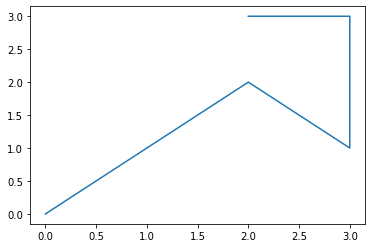

<Figure size 432x288 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt
plt.plot([0,1,2,3,3,3,2], [0,1,2,1,1,3,3])
plt.show()
plt.savefig("dummy.png")

In [79]:
print(type(plt))
plt

<class 'module'>


<module 'matplotlib.pyplot' from '/home/rlucas/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

**Exemple plus complet**

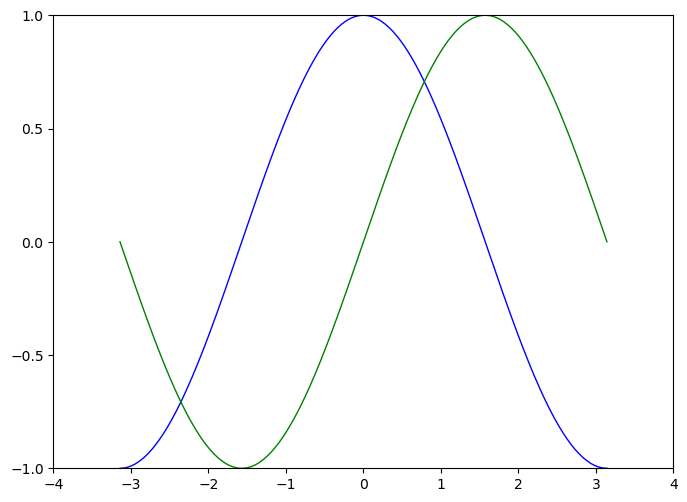

In [80]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0,4.0)

# Set x ticks
plt.xticks(np.linspace(-4,4,9,endpoint=True))

# Set y limits
plt.ylim(-1.0,1.0)

# Set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()

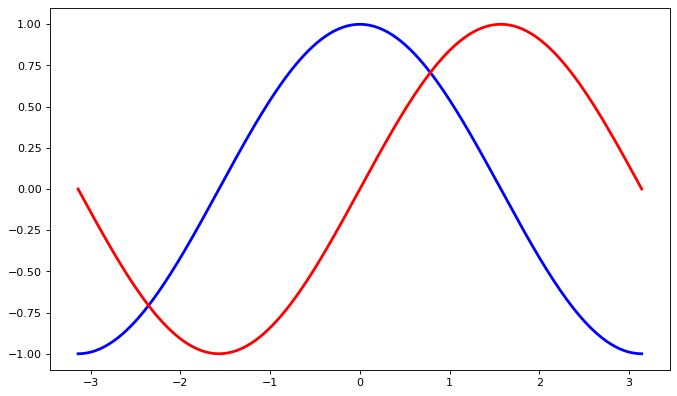

In [81]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

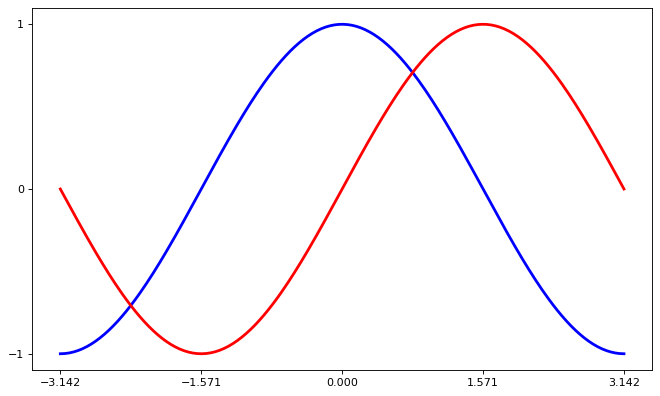

In [82]:
plt.figure(figsize=(10,6), dpi=80)
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

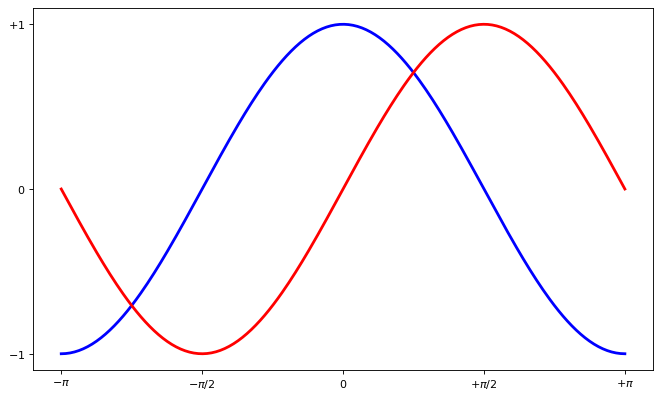

In [83]:
plt.figure(figsize=(10,6), dpi=80)
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

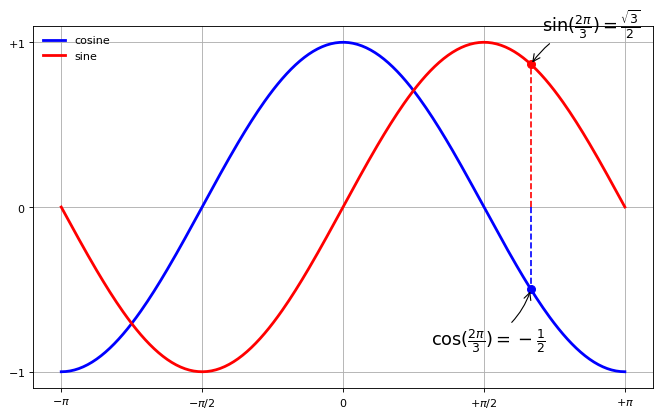

In [84]:
plt.figure(figsize=(10,6), dpi=80)
# Ajouter une annotation
t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
#fin de l'annotation

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

# affiche la grille
plt.grid()

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
# affiche la légende
plt.legend(loc='upper left', frameon=False)
plt.show()

> On a pu construire un graphe assez intéressant, cependant pour aller plus loin, il faut utiliser l'approche objet ! 

#### Approche orienté objet

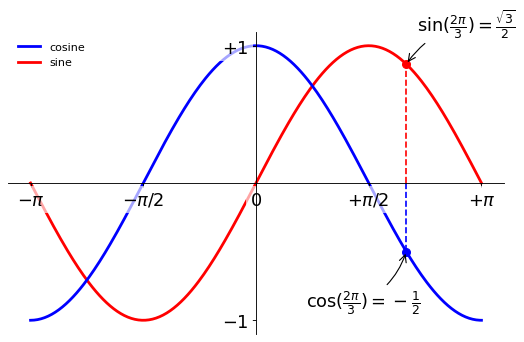

In [85]:
plt.figure(figsize=(8,5), dpi=80)

#### PARTIE OBJET #####
ax = plt.subplot(111) # on instancie ax
# on supprime le cadre
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
#### FIN  PARTIE OBJET #####


X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine",
         zorder=-1)
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine",
         zorder=-2)


plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

plt.legend(loc='upper left', frameon=False)

t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)],
         color ='blue',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),  xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)],
         color ='red',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),  xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

plt.show()


####  De nombreux types de plots

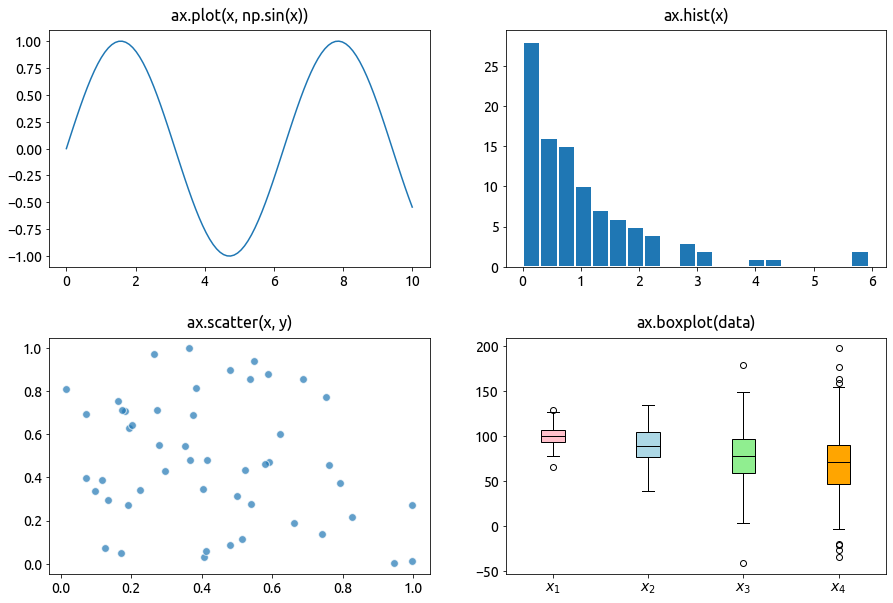

In [86]:
# On instancie directement notre figure, y compris son controleur fig pour l'export
fig, ax = plt.subplots(2, 2, figsize=(15, 10)) # on crée 4 cadrans

np.random.seed(196801)

title_style = dict(pad=10, fontname="Ubuntu", fontsize=16)

# coin haut gauche
linear = np.linspace(0, 10, 100)
ax[0, 0].plot(linear, np.sin(linear))
ax[0, 0].set_title("ax.plot(x, np.sin(x))", **title_style)

# coin haut droit
exp = np.random.exponential(size=100)
ax[0, 1].hist(exp, bins=20, edgecolor="white", linewidth=2)
ax[0, 1].set_title("ax.hist(x)", **title_style)

# coin bas gauche
x, y = np.random.uniform(size=(2, 50))
ax[1, 0].scatter(x, y, s=60, alpha=0.7, edgecolor="white", linewidth=1)
ax[1, 0].set_title("ax.scatter(x, y)", **title_style)

# coin droit gauche
labels = ["$x_1$", "$x_2$", "$x_3$", "$x_4$"]
colors = ["pink", "lightblue", "lightgreen", "orange"]
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]

bp = ax[1, 1].boxplot(data, patch_artist=True, labels=labels, widths=0.25)
for elt, color in zip(bp["boxes"], colors):
    elt.set_facecolor(color)
for elt in bp["medians"]:
    elt.set_color("black")
ax[1, 1].set_title("ax.boxplot(data)", **title_style)

for ax_ in ax.ravel(): # une boucle sur les sous-plots
    for tick in ax_.xaxis.get_major_ticks() + ax_.yaxis.get_major_ticks(): # on fait en sorte que tout soit lisible
        tick.label.set_fontsize(14)
        tick.label.set_fontname("Ubuntu")

# Au niveau de la figure: ajuste l'espacement
fig.subplots_adjust(hspace=0.3) 
# Sauvegarde
fig.savefig("mulitplot.png", bbox_inches="tight")

plt.show()

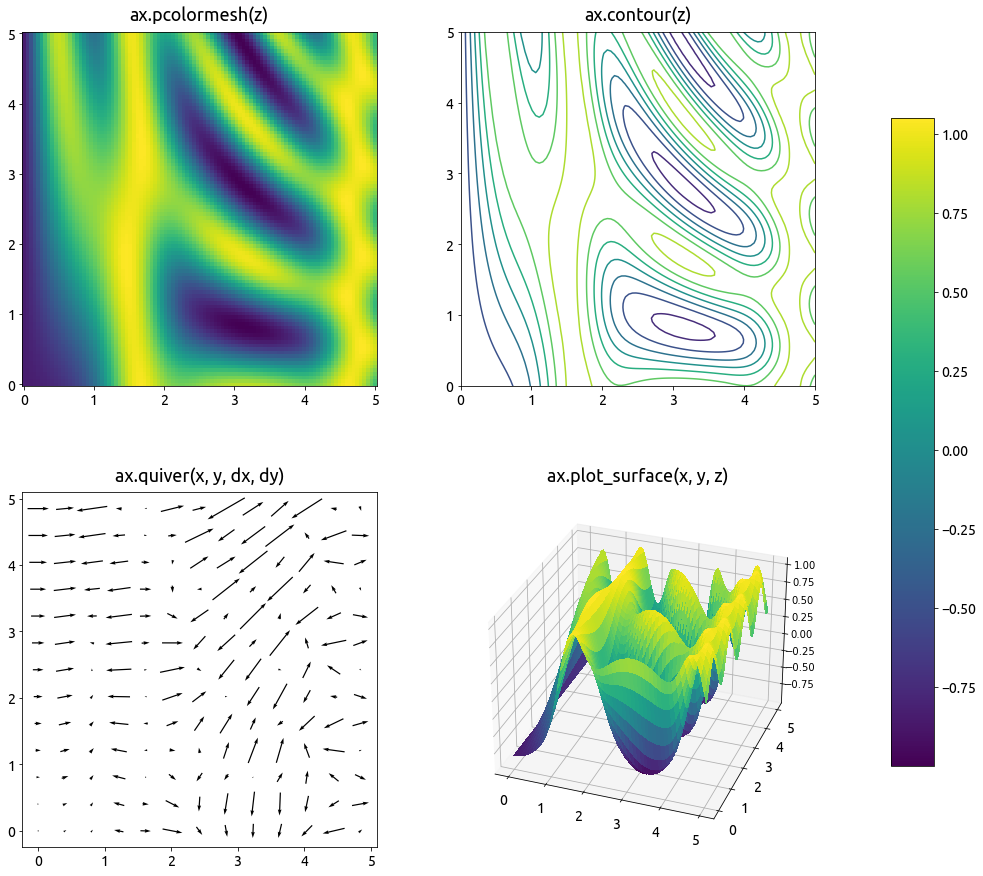

In [87]:

fig = plt.figure(figsize=(15, 15))

#Cette fois ci, on crée les sous-plots après coup
ax = np.array(
    [
        [fig.add_subplot(221), fig.add_subplot(222)],
        [fig.add_subplot(223), fig.add_subplot(224, projection="3d")],
    ]
)

title_style = dict(pad=10, fontname="Ubuntu", fontsize=18)

#génération de données scalaires
x, y = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

img = ax[0, 0].pcolormesh(x, y, z, shading="auto")
ax[0, 0].set_title("ax.pcolormesh(z)", **title_style)
ax[0, 0].set_aspect(1)

ax[0, 1].contour(x, y, z)
ax[0, 1].set_title("ax.contour(z)", **title_style)
ax[0, 1].set_aspect(1)

#Données vectorielles
dx = (
    -10 * np.cos(x) * np.sin(x) ** 9
    - y * np.sin(10 + y * x) * np.cos(x)
    - np.cos(10 + y * x) * np.sin(x)
)
dy = -np.cos(x) * x * np.sin(10 + y * x)
step = 8
ax[1, 0].quiver(
    x[::step, ::step],
    y[::step, ::step],
    dx[::step, ::step],
    dy[::step, ::step],
    pivot="mid",
    units="inches",
    width=0.017,
)
ax[1, 0].set_title("ax.quiver(x, y, dx, dy)", **title_style)
ax[1, 0].set_aspect(1)

ax[1, 1].plot_surface(x, y, z, cmap="viridis", linewidth=0, antialiased=False)
ax[1, 1].set_title("ax.plot_surface(x, y, z)", **title_style)
ax[1, 1].view_init(elev=30.0, azim=290)


for ax_ in ax.ravel():
    for tick in ax_.xaxis.get_major_ticks() + ax_.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
        tick.label.set_fontname("Ubuntu")

fig.subplots_adjust(hspace=0.3, wspace=0.1)

cax = plt.axes([0.95, 0.2, 0.04, 0.6])
cbar = fig.colorbar(img, cax=cax)

for tick in cbar.ax.get_ymajorticklabels():
    tick.set_fontsize(14)
    tick.set_fontname("Ubuntu")

fig.savefig("fig07.png", bbox_inches="tight")

plt.show()

**On peut même traiter des données géographiques avec `cartopy`**

In [88]:
from cartopy import crs, feature
from matplotlib.transforms import offset_copy
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(131, projection=crs.Mercator())
ax2 = fig.add_subplot(132, projection=crs.Orthographic(0, 60))
ax4 = fig.add_subplot(133, projection=crs.EuroPP())

for ax_ in [ax1, ax2, ax4]:
    # Données du projet Natural Earth (disponibles au 10, 50 et 110 millionièmes)
    ax_.add_feature(feature.COASTLINE.with_scale("50m"))
    ax_.plot(  # dans l'ordre longitude, latitude
        6.865,
        45.832778,
        marker="o",
        color="black",
        transform=crs.PlateCarree(),
    )

    geodetic_transform = crs.PlateCarree()._as_mpl_transform(ax_)
    text_transform = offset_copy(geodetic_transform, units="dots", x=15)

    ax_.text(
        6.865,
        45.832778,
        "Mont Blanc",
        fontsize=14,
        fontname="Ubuntu",
        bbox=dict(boxstyle="round", facecolor="w", edgecolor="k", lw=2),
        transform=text_transform,
    )
    ax_.set_global()

style = dict(fontname="Ubuntu", fontsize=16, pad=15)
ax1.set_title("projection=crs.Mercator()", **style)
ax2.set_title("projection=crs.Orthographic(0, 60)", **style)
ax4.set_title("projection=crs.EuroPP()", **style)

fig.savefig("fig17.png", bbox_inches="tight")
plt.show()

ModuleNotFoundError: No module named 'cartopy'

**Et même des animations**

In [95]:
%matplotlib inline

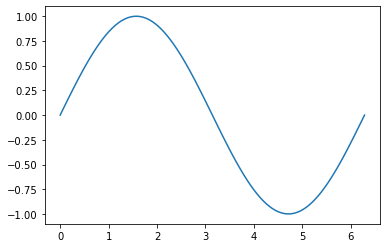

In [96]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

In [97]:
%matplotlib notebook 
# une petite magic pour animer notre plot dans le notebook

<IPython.core.display.Javascript object>


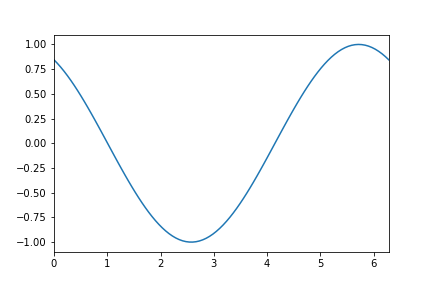

In [98]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

line, = ax.plot([]) #unpacking du plot  de type <class 'matplotlib.lines.Line2D'>

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y)) # on devrait passer line en argument pour un cas plus général
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()



On peut créer des visualisations de grande qualité à partir de matplotlib :
- https://matplotlib.org/stable/gallery/index.html
- https://github.com/rougier/matplotlib-tutorial
- https://github.com/rougier/scientific-visualization-book

La bibliothèque est extremement vaste et polyvalente.
- impossible de tout connaitre
- **en général on s'inspire de scripts existant**

### Et beaucoup, beaucoup... beaucoup d'autres

- `scipy` "Fédération" des bibliothèques à usage scientifique https://docs.scipy.org/doc/scipy/
- Manipulation et analyse de données`pandas`: https://pandas.pydata.org/docs/user_guide/10min.html
- Mathématiques symboliques `sympy` : https://docs.sympy.org/latest/index.html
- Manipulation d'images `pillow`/`PIL`   : https://pillow.readthedocs.io/en/stable/handbook/tutorial.html
- Machine Learning `tensorflow`/`keras` :https://www.tensorflow.org/overview?hl=fr
- ...

### `scipy`

Contient de trés nombreux subpackages 
- Special functions ( scipy.special )
- Integration ( scipy.integrate )
- Optimization ( scipy.optimize )
- **Interpolation** ( scipy.interpolate )
- Fourier Transforms ( scipy.fft )
- Signal Processing ( scipy.signal )
- Linear Algebra ( scipy.linalg )
- Sparse eigenvalue problems with ARPACK
- Compressed Sparse Graph Routines ( scipy.sparse.csgraph )
- Spatial data structures and algorithms ( scipy.spatial )
- Statistics ( scipy.stats )
- Multidimensional image processing ( scipy.ndimage )
- File IO ( scipy.io )

In [ ]:
from scipy import interpolate

In [ ]:
%matplotlib inline

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interpolate.interp1d(x, y)
f2 = interpolate.interp1d(x, y, kind='cubic')

In [ ]:
plt.figure(figsize=(12,8))
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

On peut évidemment répliquer en 2 dimensions.

> On dispose des valeurs de la fonction $$f(x,y)=x(1-x)\cos(4\pi x) \times \sin(4 \pi y^2)^2$$ aux points $(x_i,y_i)$ pour $i\in [0,N]$. Comment l'interpoler sur une grille régulière.

`scipy.interpolate.griddata` est parfaitement adapté pour résoudre ce problème.

In [ ]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [ ]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [ ]:
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

In [ ]:
from scipy.interpolate import griddata
# On essaye les différentes méthodes d'interpolation
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')

plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)

plt.show()

### `pandas`

**En bref:**
- construit sur numpy
- analyse et manipulation de données 1d (séries), 2d (DataFrame) et 3d (Panel)
- données étiquetées ($\approx$ table SQL)
- homogénéité des donneés requises

 Serie | DataFrame
 :------: | :------: 
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg" width="120">|<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" width="400">

In [9]:
import  pandas as pd 

#### Créerr des données pandas

In [10]:
data=np.array(np.random.randn(4,4))

# Depuis numpy avec des noms pour les colonnes
df=pd.DataFrame(data,columns=['A','B','C','D']) 
display(df)

# Depuis numpy avec des noms pour les colonnes ET les lignes
df=pd.DataFrame(data,index=['a','b','c','d'],columns=['A','B','C','D'])
display(df)

# Depuis un dictionnaire ou une liste
dict = {'Gen':["1st", "2nd", "3nd"],
        'Year': [2017, 2019, 2021],
        'Name': ["Naples","Rome","Milan"],
        'Cores': np.array([32, 64, 64])}
df=pd.DataFrame(dict) 
display(df)

,A,B,C,D
0,0.737305,-0.200985,1.593529,0.005523
1,0.892881,1.938454,-0.906993,1.597361
2,-0.353223,0.824540,-0.614063,-2.248742
3,1.539687,0.327981,1.453061,-0.486744


,A,B,C,D
a,0.737305,-0.200985,1.593529,0.005523
b,0.892881,1.938454,-0.906993,1.597361
c,-0.353223,0.824540,-0.614063,-2.248742
d,1.539687,0.327981,1.453061,-0.486744


,Gen,Year,Name,Cores
0,1st,2017,Naples,32
1,2nd,2019,Rome,64
2,3nd,2021,Milan,64


#### Manipuler les données

In [11]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.103069,0.966326
1,bar,one,-1.016519,-0.776534
2,foo,two,-1.355371,-0.764069
3,bar,three,-0.867132,-0.122672
4,foo,two,-0.196145,-0.163869
5,bar,two,1.260296,-1.277361
6,foo,one,-0.170238,-2.822015
7,foo,three,-0.133963,0.646668


In [12]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.623355,-2.176567
foo,-1.958786,-2.136958


In [13]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.016519 -0.776534
    three -0.867132 -0.122672
    two    1.260296 -1.277361
foo one   -0.273308 -1.855689
    three -0.133963  0.646668
    two   -1.551515 -0.927937

#### IOs

En général, on ira plutot chercher des données externes.
![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

In [ ]:
file="https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv"
#file="https://corgis-edu.github.io/corgis/datasets/csv/covid/covid.csv" 

df = pd.read_csv(file)
print(df.shape)
display(df)

In [ ]:
df = pd.read_csv(file,nrows=10) #partially read a file : read  only first rows
print(df.shape)
display(df)

In [ ]:
df = pd.read_csv(file,nrows=10, skiprows=3) # skip first 3 rows
print(df.shape)
display(df)

C'est n'est qu'un aperçu des possibilités. Comme pour les autres paquets, quelques ressources: 
- [Le plus court des tutos officiels](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Tuto officiel détaillé](https://pandas.pydata.org/docs/getting_started/intro_tutorials/)
- [Tuto externe avec des applications sympa](https://aaltoscicomp.github.io/python-for-scicomp/pandas/)